Source

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def simSISGCG(n,It_func,learn_func,util_func,T=10,I0=0.001):
    # n=len(c)
    N=list(range(n))
    b=np.array([1/n]*n)
    aa=np.zeros((T,n))
    # aa[0]=[1]*5+[0]*5
    II=np.zeros(T)
    II[0]=I0
    # It=None
    for t in range(T-1):
        agent=np.random.choice(N,p=b)
        II[t+1]=It_func(aa[:t+1],II[t])

        a0=aa[t].copy()
        a1=aa[t].copy()
        a0[agent]=0
        a1[agent]=1

        utils=(util_func(agent,II[t+1],a0),util_func(agent,II[t+1],a1))
        new_a=[a0,a1][learn_func(utils)]
        # print(new_a)
        aa[t+1]=new_a
    return (aa,II)
def utility_maker(q,A):
    def utility(i,It,a):
        Ni1=A[i]@a
        return a[i]*Ni1*(q+It)+(1-a[i])*(np.sum(A[i])-Ni1)
    return utility
def LLL_maker(tau):
    def LLL(utils):
        tau_frac=1/tau
        p0=np.e**(tau_frac*utils[0])/(np.e**(tau_frac*utils[0])+np.e**(tau_frac*utils[1]))
        # print(p0)
        return np.random.choice([0,1],p=[p0,1-p0])
    return LLL
def It_func_maker(A,b0,b1,gamma,I0=0.0001):
    n=len(A)
    def It_func(history,It=None):
        if It is None:
            It=I0
        bt=((b1*np.sum(history[-1]))+b0*(n-np.sum(history[-1])))/n
        return It+bt*It*(1-It)-gamma*It
    return It_func
def avg_path(paths):
    M=np.array(paths)
    avgs=np.sum(M,axis=0)/len(M)
    return avgs

A Run of SISGCG

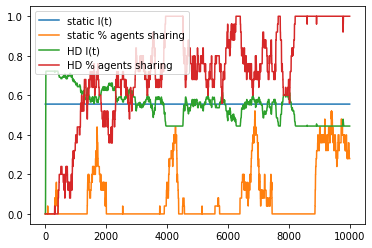

In [ ]:
np.random.seed(0)

n=25
T=10000
runs=30

g=nx.path_graph(n)
g.add_edge(0,n-1)
# nx.draw(g)
A=nx.to_numpy_array(g)
b0,b1=(0.9,0.45)
gamma=0.25
q=0.001+1-gamma/b1
It_func=It_func_maker(A,b0,b1,gamma)
It_func_static=lambda x,y:gamma/b1
util_func=utility_maker(q,A)

# v_func=lambda x: np.array([underbarv]*n)

LLL=LLL_maker(tau=0.3)

AA_dependent=[]
AA_reference=[]
# for i in range(runs):
aa,II=simSISGCG(n,It_func_static,LLL,util_func,T=T,I0=gamma/b1)
sharing=np.sum(aa,axis=1)/len(aa[0])
plt.plot(II,label="static I(t)")
plt.plot(sharing,label="static % agents sharing")
    # AA_reference.append(sharing)

aa,II=simSISGCG(n,It_func,LLL,util_func,T=T,I0=0.001)
sharing=np.sum(aa,axis=1)/len(aa[0])
plt.plot(II,label="HD I(t)")
plt.plot(sharing,label="HD % agents sharing")
    # AA_dependent.append(sharing)
plt.legend()

Many runs

Text(0, 0.5, 'Fraction of Agents Playing 1')

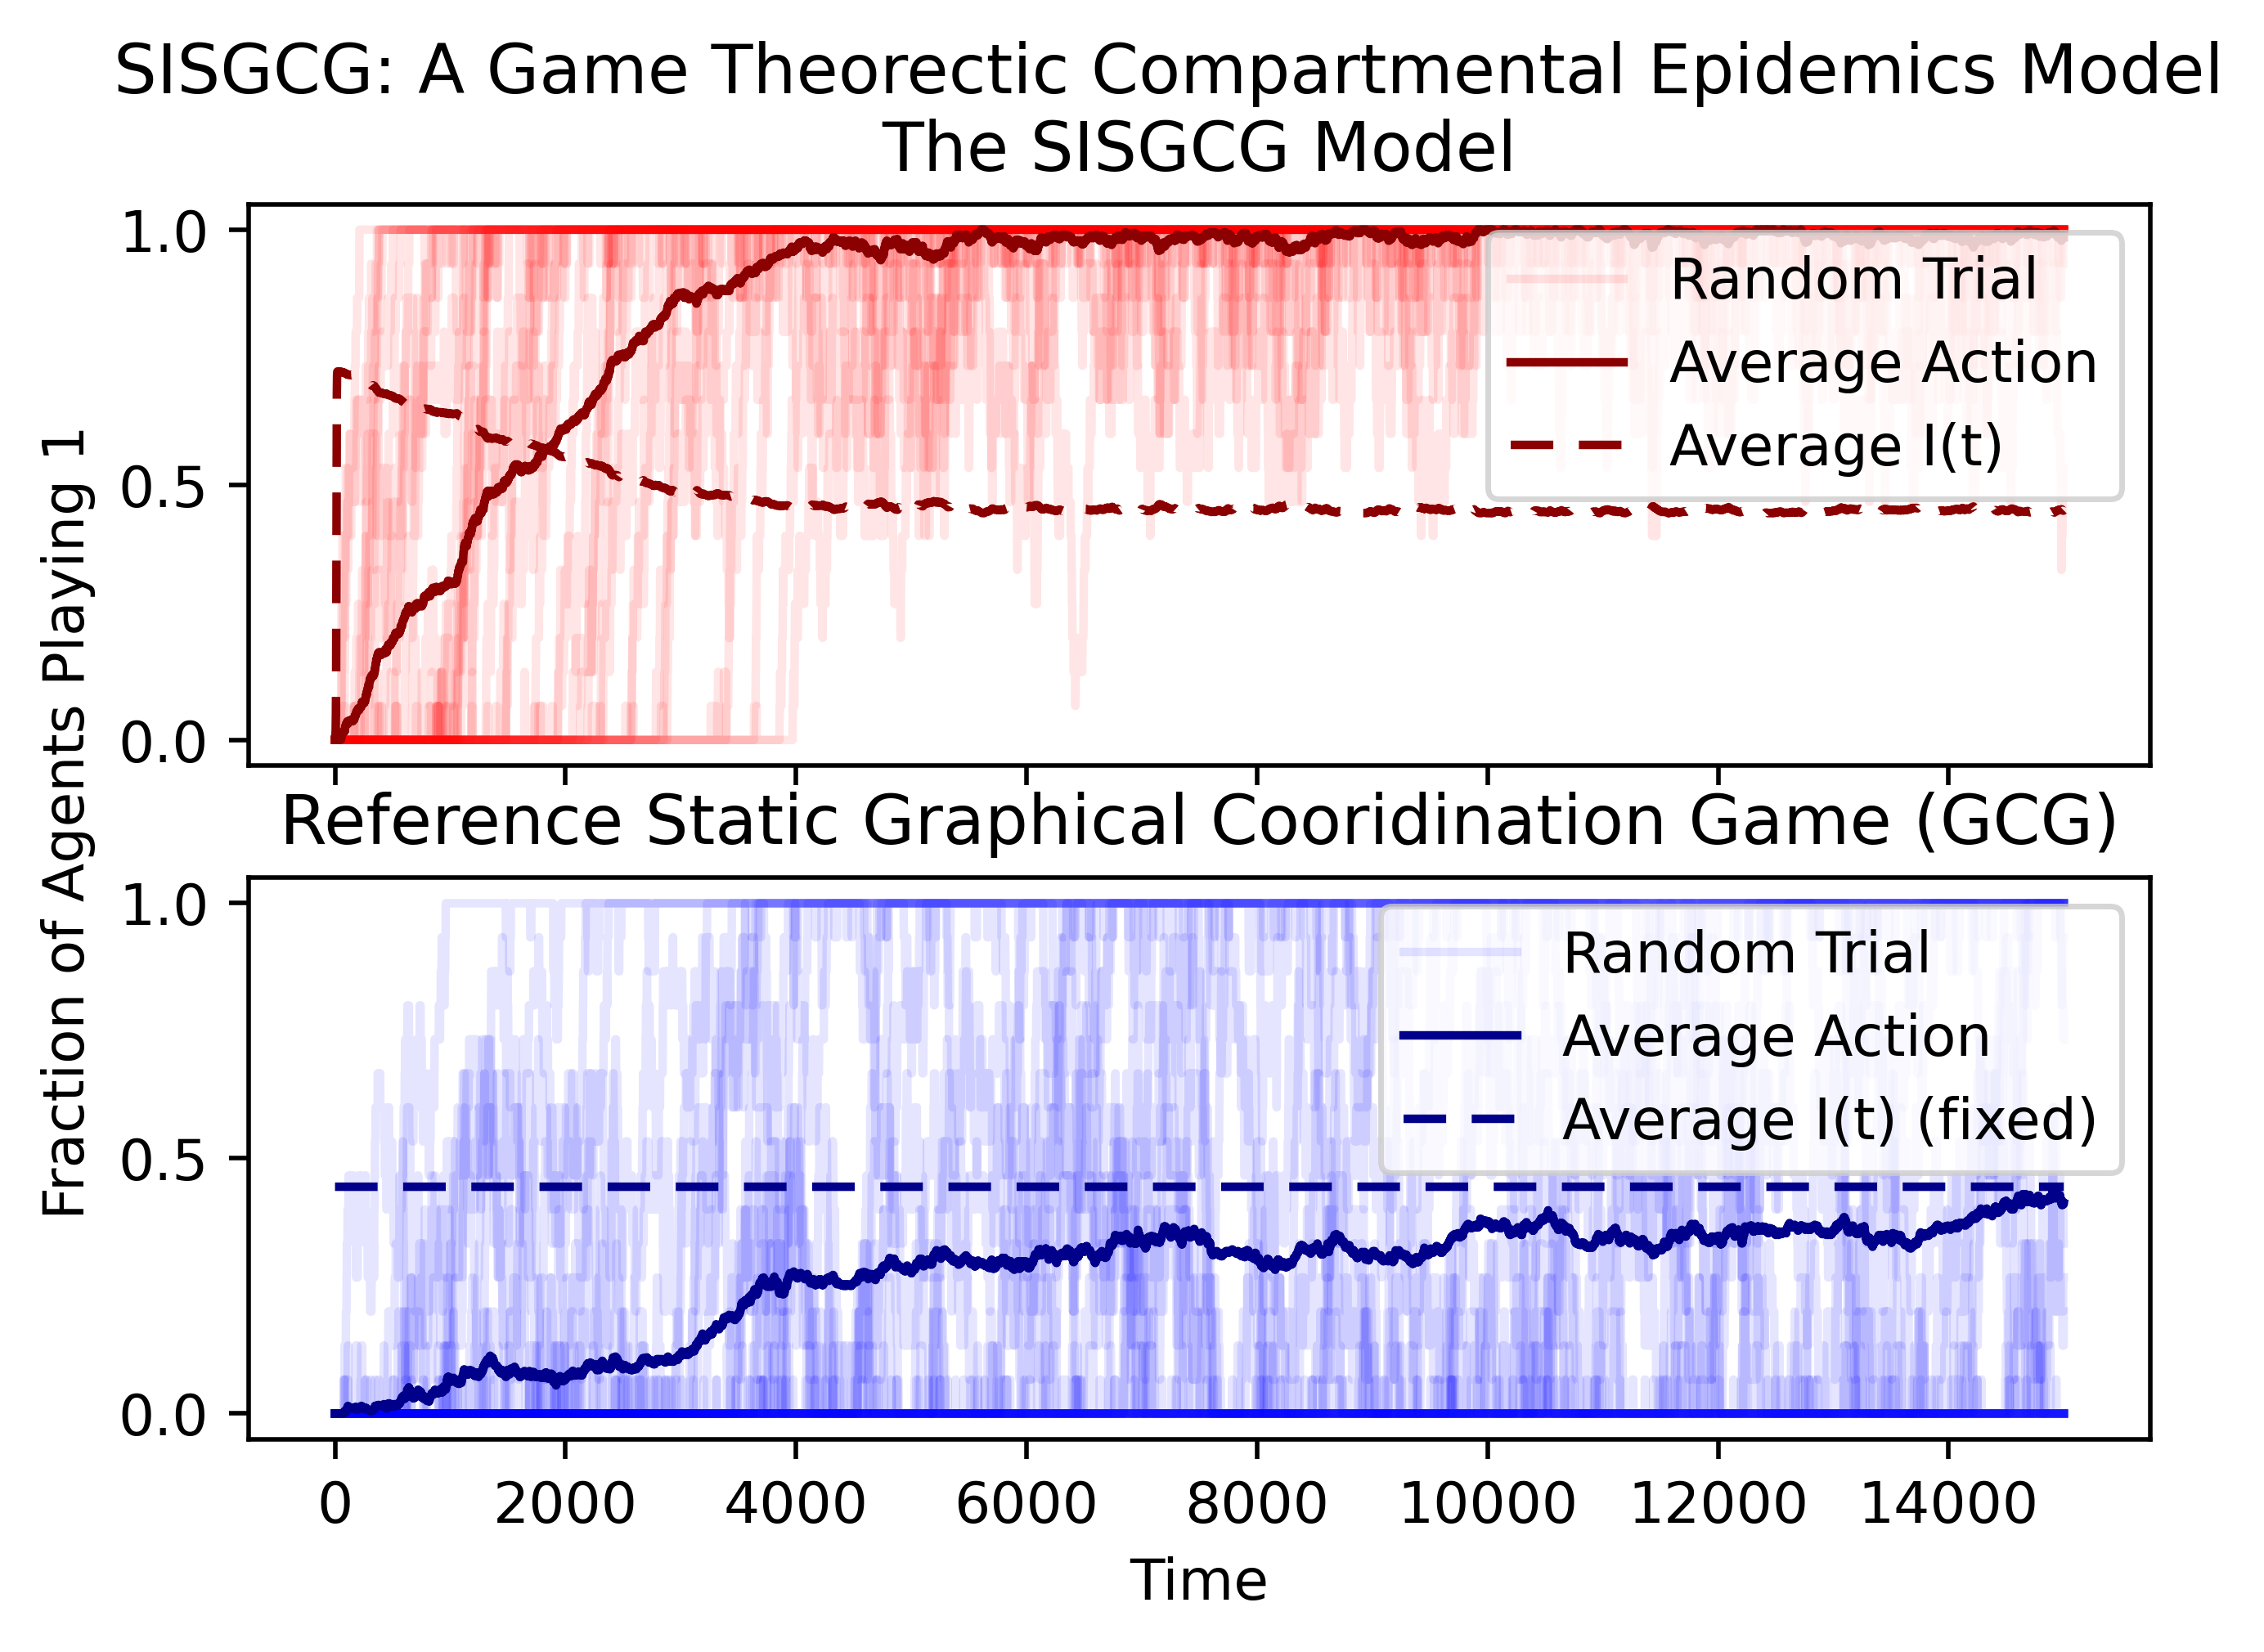

In [ ]:


n=15
T=15000
runs=40

g=nx.path_graph(n)
g.add_edge(0,n-1)
# nx.draw(g)
A=nx.to_numpy_array(g)
b0,b1=(0.9,0.45)
gamma=0.25
q=0.001+gamma/b1
# c=np.array([0.4]*n)
# underbarv=calc_underbarv_potential(c,A)
# underbarv=0.1
# print(f"underbarv: {underbarv}")
It_func=It_func_maker(A,b0,b1,gamma)
It_func_static=lambda x,y:1-gamma/b1
util_func=utility_maker(q,A)

# v_func=lambda x: np.array([underbarv]*n)

LLL=LLL_maker(tau=0.3)

AA_dependent=[]
AA_reference=[]

II_dependent=[]
II_reference=[]


np.random.seed(0)
for i in range(runs):
    aa,II=simSISGCG(n,It_func_static,LLL,util_func,T=T,I0=1-gamma/b1)
    sharing=np.sum(aa,axis=1)/len(aa[0])
    AA_reference.append(sharing)
    II_reference.append(II)

for i in range(runs):
    aa,II=simSISGCG(n,It_func,LLL,util_func,T=T,I0=0.001)
    sharing=np.sum(aa,axis=1)/len(aa[0])
    AA_dependent.append(sharing)
    II_dependent.append(II)


dependent_avg=avg_path(AA_dependent)
dependent_II_avg=avg_path(II_dependent)
reference_avg=avg_path(AA_reference)
reference_II_avg=avg_path(II_reference)

AAd=np.array(AA_dependent)
AAr=np.array(AA_reference)

# print(avg_path(AA_dependent))
# plt.figure()

fig, axs = plt.subplots(2,sharex=True,sharey=True,dpi=500)
# plt.title("SISGCG: History Dependent Versus Static")

fig.suptitle('SISGCG: A Game Theorectic Compartmental Epidemics Model')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)


axs[0].plot(AAd.T,color="red",alpha=0.1)
axs[0].plot([],color="red",alpha=0.1,label="Random Trial")
axs[0].plot(dependent_avg,color="darkred",alpha=1,label="Average Action")
# axs[1].plot(reference_avg,color="darkblue",linestyle="-",alpha=1,label="GCG Average Action")
axs[0].plot(dependent_II_avg,color="darkred",linestyle=(0,(5,3)),alpha=1)
axs[0].plot([],color="darkred",linestyle=(0,(5,3)),alpha=1,label="Average I(t)")
# plt.plot([],color="darkred",alpha=0.1,label="HD average")
axs[0].set(title="The SISGCG Model")
axs[0].legend(loc="upper right")

axs[1].plot([],color="blue",alpha=0.1,label="Random Trial")
axs[1].plot(AAr.T,color="blue",alpha=0.1)
axs[1].plot(reference_avg,color="darkblue",linestyle="-",alpha=1,label="Average Action")
axs[1].plot(reference_II_avg,color="darkblue",linestyle=(0,(5,3)),alpha=1,label="Average I(t) (fixed)")
# axs[0].plot(dependent_avg,color="darkred",alpha=1,label="SISGCG Average Action")
# axs[0].plot([],color="darkred",linestyle=(0,(1,3)),alpha=1,label="SISGCG Average I(t)")

axs[1].legend(loc="upper right")
axs[1].set(title="Reference Static Graphical Cooridination Game (GCG)")
# axs[0].title("sad")





fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Time")
plt.ylabel("Fraction of Agents Playing 1")


Alternative Plot

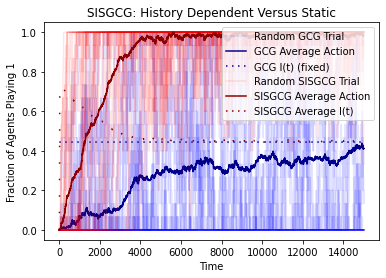

In [ ]:
plt.plot([],color="blue",alpha=0.1,label="Random GCG Trial")
plt.plot(AAr.T,color="blue",alpha=0.1)
plt.plot(reference_avg,color="darkblue",linestyle="-",alpha=1,label="GCG Average Action")
plt.plot(reference_II_avg,color="darkblue",linestyle=(0,(1,3)),alpha=1,label="GCG I(t) (fixed)")

plt.plot(AAd.T,color="red",alpha=0.1)
plt.plot([],color="red",alpha=0.1,label="Random SISGCG Trial")
plt.plot(dependent_avg,color="darkred",alpha=1,label="SISGCG Average Action")
plt.plot(dependent_II_avg,color="darkred",linestyle=(0,(1,10)),alpha=1)
plt.plot([],color="darkred",linestyle=(0,(1,3)),alpha=1,label="SISGCG Average I(t)")
# plt.plot([],color="darkred",alpha=0.1,label="HD average")

plt.xlabel("Time")
plt.ylabel("Fraction of Agents Playing 1")
plt.title("SISGCG: History Dependent Versus Static")
plt.legend(loc="upper right")